In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych: XOR<H1>

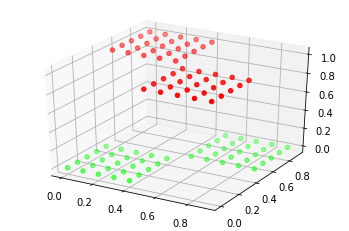

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

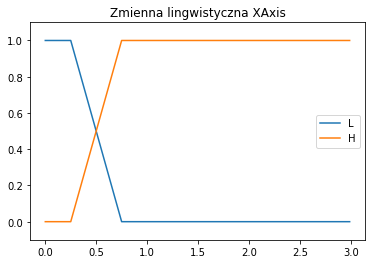

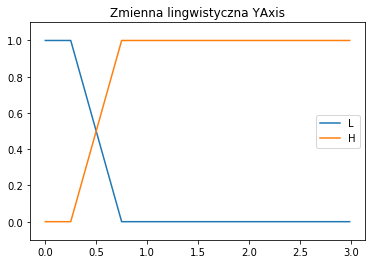

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.21148858 0.33607461 0.03282041]
 [0.0365778  0.34404075 0.89858358]
 [0.37517455 0.57890528 0.48261348]
 [0.34294856 0.5883668  0.7174752 ]]


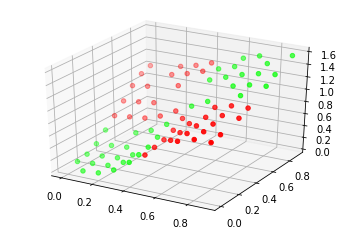

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   3.330210084194052e-07
Liczba ew:  41250
Liczba it:  50
TIME elapsed:  9.154677152633667


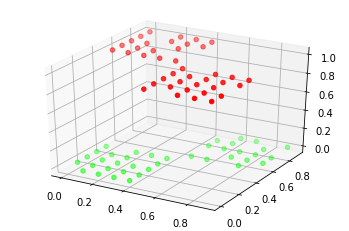

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

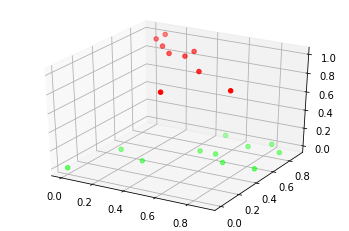

[[11  0]
 [ 0  9]]


In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

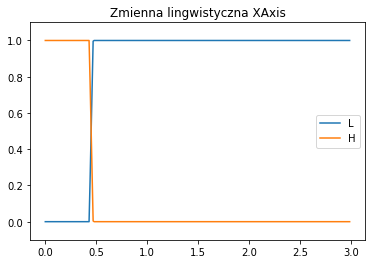

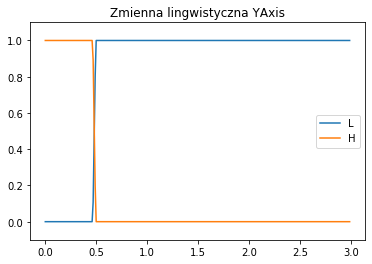

In [7]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [8]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [array([ 0.4506099 , -0.03907749]), array([ 0.48130348, -0.02879473])] 
Konkluzje:  [[3.84029581e-13 3.31226700e-13 5.22333678e-12]
 [5.02816599e-12 5.18714781e-13 1.00000002e+00]
 [1.34127107e-13 5.62400839e-13 9.99999998e-01]
 [1.91758532e-13 4.05784239e-11 1.07101948e-12]]


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

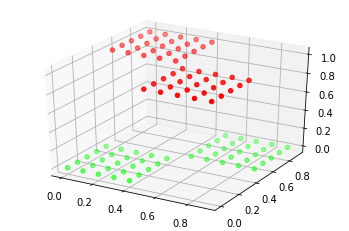

In [9]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [10]:
fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

SyntaxError: invalid syntax (<ipython-input-10-3597d7f055b1>, line 1)

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4 ...). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, ważne żeby było widać jaka jest zależność.

In [ ]:
%matplotlib auto

In [ ]:
%matplotlib inline

In [ ]:
x = np.arange(1, 2.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.multiply(np.round(dataX),np.round(dataY))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

In [ ]:
varX = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(1.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

In [ ]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

In [ ]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

In [ ]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [ ]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

In [ ]:
fis.premises = [[ 1.45462313, -0.05206001], [ 1.45118139, -0.09198265]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.tsk = [[5.71428299e-01, 5.71428652e-01, 2.00000000e+00],
 [7.81216873e-07, 7.88496429e-20, 1.99999896e+00],
 [1.41753706e-08, 1.06690462e-16, 2.00000000e+00],
 [3.27373199e-08, 2.29266611e-09, 9.99999999e-01]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()